In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chung-cu-hanoi/dataset.csv


In [21]:
df = pd.read_csv("/kaggle/input/chung-cu-hanoi/dataset.csv")
print(df.head(10))
df = df.drop(columns=['id','project','month'])
print(df.shape)


         id  month                      project  \
0  28086120     12   Vinhomes Smart City Đại Mỗ   
1  28088954     12                Goldmark City   
2  28097966     12         Chung cư IEC Tứ Hiệp   
3  27895887     12          Vinhomes D'Capitale   
4  28056031     12            The Zen Residence   
5  28056300     12          Vinhomes West Point   
6  28115859     12  Vinhomes Symphony Riverside   
7  28112470     12          Vinhomes West Point   
8  28118426     12            Hyundai Hillstate   
9  28042647     12         Phú Thịnh Green Park   

                                            investor  square  bedrooms  \
0                                  Tập đoàn Vingroup    60.0       3.0   
1  Công ty TNHH Thương mại - Quảng cáo - Xây dựng...   121.0       3.0   
2                                                NaN    70.0       2.0   
3                               Tân Hoàng Minh Group    39.0       1.0   
4                  Công ty TNHH Gamuda Land Việt Nam    97.0       3

In [22]:
for column in df.columns:
    print(f"\n--- Value counts for column: {column} ---")
    print(df[column].value_counts(dropna=False))  
filtered_df = df[(df['ward'] == 'phuc la') & (df['price'] >= 2000)]
print(filtered_df)
print(filtered_df.shape)


--- Value counts for column: investor ---
investor
NaN                                                                 15709
Tập đoàn Vingroup                                                    8874
Công ty TNHH Thương mại - Quảng cáo - Xây dựng - Địa ốc Việt Hân     4242
Doanh nghiệp tư nhân xây dựng số 1 tỉnh Điện Biên                    4187
Công ty CP Xuất nhập khẩu tổng hợp Hà Nội - Geleximco                2146
                                                                    ...  
Công ty CP Đầu tư và Xây dựng số 18                                     1
Công ty CP SIMCO Sông Đà                                                1
Công ty CP Đầu tư Phát triển Đô thị Kiến Hưng                           1
Công ty CP Bất động sản Mê Kông                                         1
Công ty CP Đầu tư XD và xuất nhập khẩu Phục Hưng                        1
Name: count, Length: 263, dtype: int64

--- Value counts for column: square ---
square
70.0     3047
75.0     2215
60.0     1902
80.0 

In [5]:
df['balcony'] = df['balcony'].fillna('none')
df['direction'] = df['direction'].fillna('unknown')
df['ward'] = df['ward'].fillna('unknown')

In [6]:
df_grouped = df.groupby('district')['ward'].apply(lambda x: list(x.unique())).reset_index()
df_grouped.head()


,district,ward
0,ba dinh,"[kim ma, cong vi, vinh phuc, thanh cong, doi c..."
1,bac tu liem,"[phu dien, co nhue 1, dong ngac, unknown, xuan..."
2,cau giay,"[trung hoa, yen hoa, nghia do, nghia tan, dich..."
3,chuong my,[chuc son]
4,dan phuong,[tan lap]


In [7]:
df_grouped.shape
df_grouped.to_csv('district_ward_list.csv', index=False)


In [8]:
result = df_grouped.to_dict(orient="records")
import json

with open("district_ward_list.json", "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=2)


In [9]:
print(df.isna().sum())


square       0
bedrooms     0
bathrooms    0
direction    0
balcony      0
district     0
ward         0
price        0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

categorical_cols = ['direction', 'balcony', 'district', 'ward']

encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])


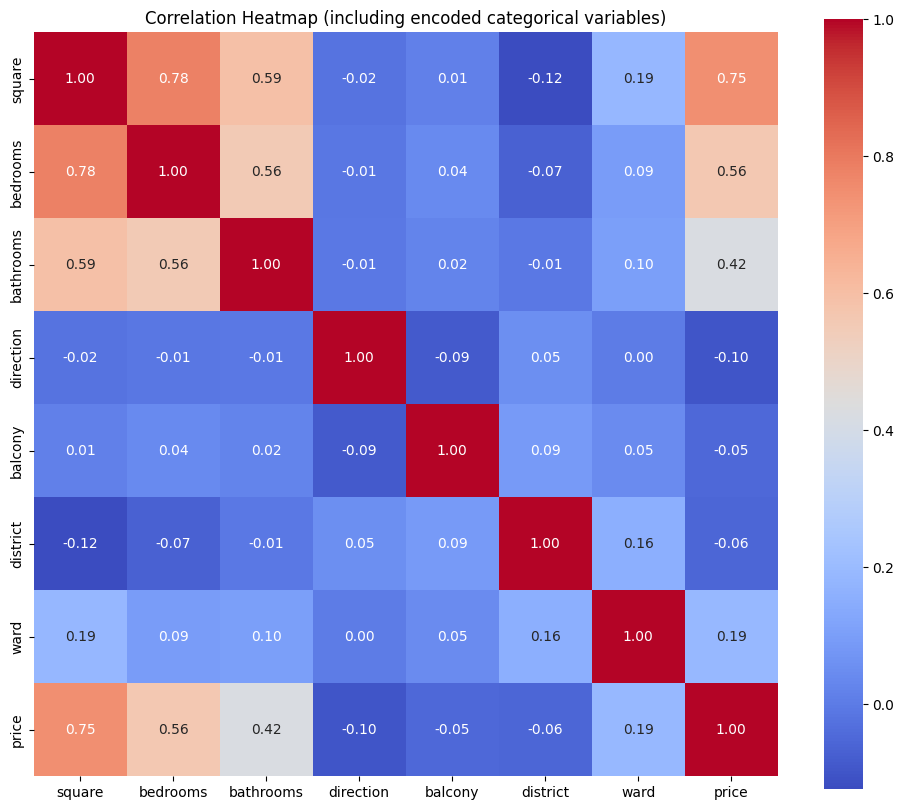

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
corr_matrix = df_encoded.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap (including encoded categorical variables)')
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81162 entries, 0 to 81161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   square     81162 non-null  float64
 1   bedrooms   81162 non-null  float64
 2   bathrooms  81162 non-null  float64
 3   direction  81162 non-null  object 
 4   balcony    81162 non-null  object 
 5   district   81162 non-null  object 
 6   ward       81162 non-null  object 
 7   price      81162 non-null  float64
dtypes: float64(4), object(4)
memory usage: 5.0+ MB


In [13]:
pd.set_option('display.max_columns', None)

In [31]:
import pandas as pd
import numpy as np
import logging
import joblib
import json


class Linear_Regression:
    def __init__(self, learning_rate=0.001, no_of_itr=1000):
        self.learning_rate = learning_rate
        self.no_of_itr = no_of_itr
        self.w = None
        self.b = None

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = np.array(X)
        self.Y = np.array(Y)
        print(X.shape,Y.shape,self.w.shape)
        logging.info(f"Starting training with {self.no_of_itr} iterations, learning rate: {self.learning_rate}")
        for i in range(self.no_of_itr):
            self.update_weights()
            if i % 100 == 0 or i == self.no_of_itr - 1:
                y_pred = self.predict(self.X)
                mse = self.mean_squared_error(self.Y, y_pred)
                logging.info(f"Iteration {i}, Mean Squared Error: {mse}")

        logging.info("Training completed")
        return self

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = - (2 / self.m) * np.dot(self.X.T, (self.Y - Y_prediction))
        db = - (2 / self.m) * np.sum(self.Y - Y_prediction)
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        # print(self.b)

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)
    def MAE(self,y_true,y_pred):
        return np.mean(np.abs(y_true-y_pred))
    def print_weights(self):
        print('Weights for the respective features are:')
        print(self.w)
        print('Bias value for the regression is:', self.b)
    def save_model(self, file_path):
        joblib.dump({
            'w': self.w,
            'b': self.b,
            'mean': getattr(self, 'mean', None),
            'std': getattr(self, 'std', None)
        }, file_path)

    def load_model(self, file_path):
        params = joblib.load(file_path)
        self.w = params['w']
        self.b = params['b']
        self.mean = params.get('mean', None)
        self.std = params.get('std', None)

def standardize_fit_transform(X):
    X = np.array(X)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std = np.where(std == 0, 1, std)
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

def standardize_transform(X, mean, std):
    X = np.array(X)
    std = np.where(std == 0, 1, std)
    return (X - mean) / std

def train_test_split(X, y, train_size=0.8, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_size = int(train_size * n_samples)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df.drop(columns=[ 'id', 'month'])
    df['balcony'] = df['balcony'].fillna('none')
    df['direction'] = df['direction'].fillna('unknown')
    df['ward'] = df['ward'].fillna('unknown')
    df['investor'] = df['investor'].fillna('unknown')
    df['project'] = df['project'].fillna('unknown')
    unique_investors = df['investor'].unique().tolist()
    with open("investors.json", "w", encoding="utf-8") as f:
        json.dump(unique_investors, f, ensure_ascii=False, indent=2)
    unique_projects = df['project'].unique().tolist()
    # print(unique_investors)
    with open("projects.json", "w", encoding="utf-8") as f:
        json.dump(unique_projects, f, ensure_ascii=False, indent=2)
        

    df_investor_project = df[['investor', 'project']].drop_duplicates()
    projects_by_investor = df_investor_project.groupby('investor')['project'].unique().to_dict()

    for investor, projects in projects_by_investor.items():
        project_list = projects.tolist()
        if not any('unknown' in p.lower() for p in project_list):
            if "unknown" not in project_list:
                project_list.append("unknown")
        projects_by_investor[investor] = project_list

    with open("projects_by_investor.json", "w", encoding="utf-8") as f:
        json.dump(projects_by_investor, f, ensure_ascii=False, indent=2)
    
    return df

def one_hot_encode(df, columns, drop_first=True):
    df_encoded = df.copy()
    encoded_columns = []
    for col in columns:
        unique_values = df[col].unique()
        if drop_first:
            unique_values = unique_values[1:]

        for val in unique_values:
            new_col = (df[col] == val).astype(int)
            new_col.name = f"{col}_{val}"
            encoded_columns.append(new_col)
    # print(df_encoded)
    df_encoded = df.drop(columns=columns)
    df_encoded = pd.concat([df_encoded] + encoded_columns, axis=1)
    df_encoded = df_encoded.copy()
    return df_encoded

def main():
    file_path = "/kaggle/input/chung-cu-hanoi/dataset.csv"  
    df = load_data(file_path)
    # print(df)
    df_encoded = df.copy()
    unique_wards = df_encoded['ward'].unique()
    print(unique_wards)
    print(df_encoded['direction'].unique().shape)
    categorical_cols = ['investor','direction', 'balcony', 'district', 'ward','project']
    df_encoded = one_hot_encode(df_encoded, categorical_cols, drop_first=False) 
    print(df_encoded.shape)
    columns = df_encoded.drop(columns=['price']).columns
    X = df_encoded.drop(columns=['price']).values
    y = df_encoded['price'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    X_train, mean, std = standardize_fit_transform(X_train)
    X_test = standardize_transform(X_test, mean, std)

    model = Linear_Regression(learning_rate=0.1, no_of_itr=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = model.mean_squared_error(y_test, y_pred)
    mae = model.MAE(y_test,y_pred)
    r2 = model.r2_score(y_test, y_pred)
    model.mean = mean
    model.std = std
    model.save_model('linear_regression_model.pkl')
    print(f"final Mean Squared Error: {mse}")
    print(f"final Mean Absolute Error: {mae}")
    print(f"final R-squared: {r2}")
    model.print_weights()
    
    
    print("\nSo sánh y_test và y_pred:")
    comparison_df = pd.DataFrame({
        'y_test (Thực tế)': y_test,
        'y_pred (Dự đoán)': y_pred
    })
    print(comparison_df)

if __name__ == "__main__":
    main()

['dai mo' 'phu dien' 'tu hiep' 'trung hoa' 'hoang liet' 'me tri'
 'phuc loi' 'unknown' 'nguyen trai' 'kim chung' 'co nhue 1'
 'thanh xuan trung' 'phuc la' 'minh khai' 'yen hoa' 'duong xa' 'my dinh 1'
 'quang trung' 'an khanh' 'mo lao' 'dong ngac' 'xuan la' 'duong noi'
 'cau dien' 'dai kim' 'la khe' 'ha cau' 'tan trieu' 'trung van' 'my dinh'
 'phu thuong' 'kim ma' 'nghia do' 'nghia tan' 'vinh tuy' 'thinh liet'
 'thanh xuan nam' 'sai dong' 'bo de' 'thuong dinh' 'gia thuy' 'dong hoi'
 'ha dinh' 'viet hung' 'giang bien' 'yen so' 'my dinh 2' 'nhan chinh'
 'thach hoa' 'dich vong' 'da ton' 'mai dich' 'quan hoa' 'phu la'
 'thuy khue' 'khuong mai' 'xuan dinh' 'tay mo' 'tan lap' 'co nhue 2'
 'yen nghia' 'van quan' 'kien hung' 'phuong canh' 'cong vi' 'ngoc lam'
 'thanh xuan bac' 'phuc dong' 'dang xa' 'o cho dua' 'long bien'
 'lang thuong' 'tran phu' 'vinh ngoc' 'tan mai' 'vinh hung' 'trung liet'
 'buoi' 'giap bat' 'tho quan' 'khuong dinh' 'dinh cong' 'dong tam'
 'phu luong' 'bach mai' 'phuong lie